# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from pandas_datareader.data import DataReader
from datetime import datetime

In [2]:
# The tech stocks we'll be using are Taiwan Semiconductors, Qualcomm, Intel, Micron
tech_list = ['TSM', 'QCOM', 'INTC', "AMD"]

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)


#For loop for getting the stock data
for stock in tech_list:   
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [3]:
company_list = [TSM, QCOM, INTC, AMD]
company_name = ["Taiwan Seminconductors Manufacturing Company Limited", "Qualcomm Incorporated", "Intel Corporation", "Advanced Micro Devices"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.sample(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2022-03-28,51.570000,50.560001,51.360001,51.509998,22932400.0,49.921005,Intel Corporation
2022-01-14,143.880005,136.089996,136.089996,140.660004,28255300.0,138.468277,Taiwan Seminconductors Manufacturing Company L...
2022-02-11,127.169998,111.809998,126.139999,113.180000,164723200.0,113.180000,Advanced Micro Devices
2022-02-07,127.629997,122.790001,123.559998,123.669998,81672500.0,123.669998,Advanced Micro Devices
2022-08-11,102.370003,98.000000,99.930000,98.120003,77516900.0,98.120003,Advanced Micro Devices
2021-12-21,117.500000,115.080002,116.070000,117.440002,6122900.0,115.610100,Taiwan Seminconductors Manufacturing Company L...
2022-02-10,131.759995,124.610001,128.839996,125.769997,108939900.0,125.769997,Advanced Micro Devices
2021-12-22,181.520004,177.630005,179.000000,181.380005,5227200.0,178.678024,Qualcomm Incorporated
2022-04-27,46.060001,45.009998,45.480000,45.220001,28320900.0,43.825043,Intel Corporation


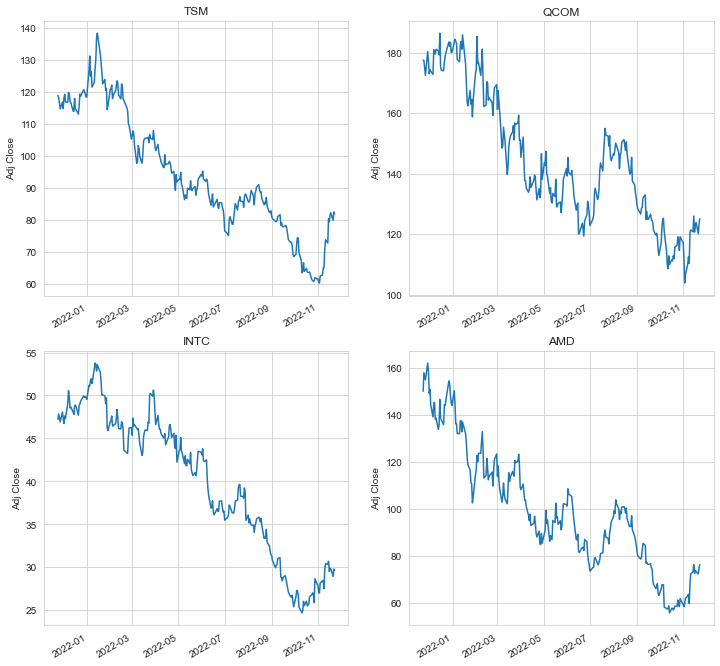

In [4]:
# To see a historical view of the closing price. For historical view we'll be using Adj. Closing price

plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

In [5]:
#Moving Average
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

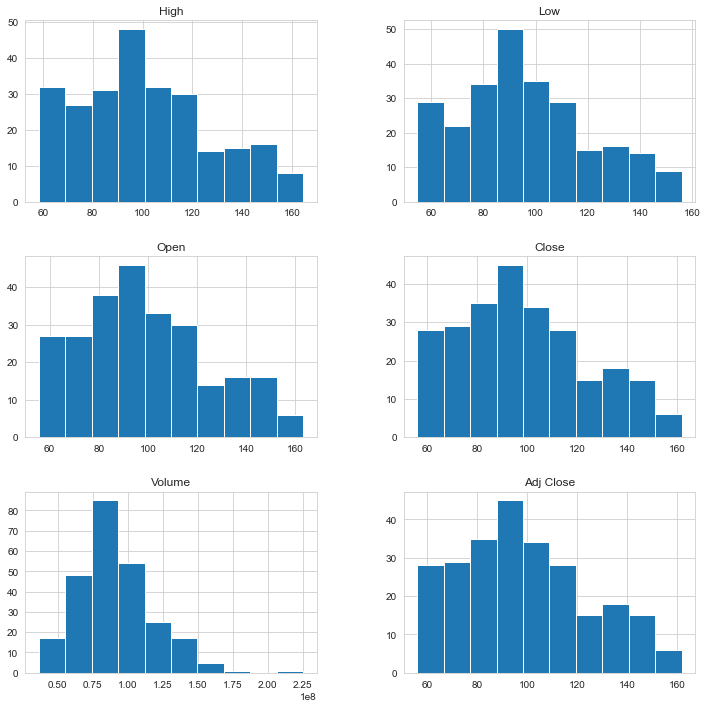

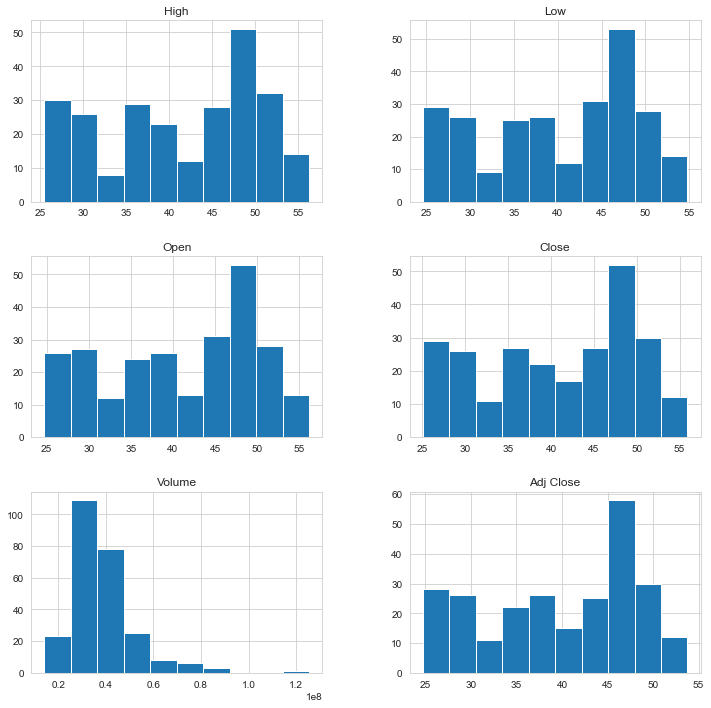

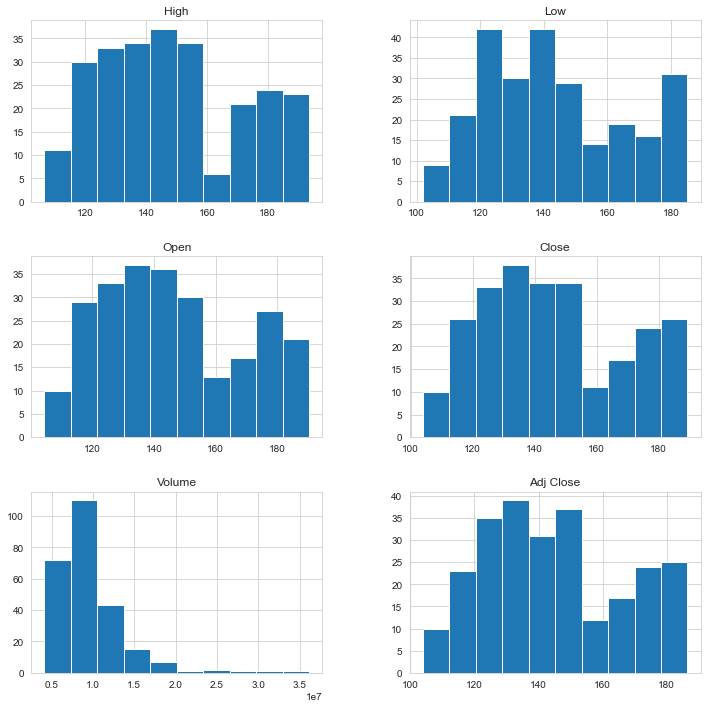

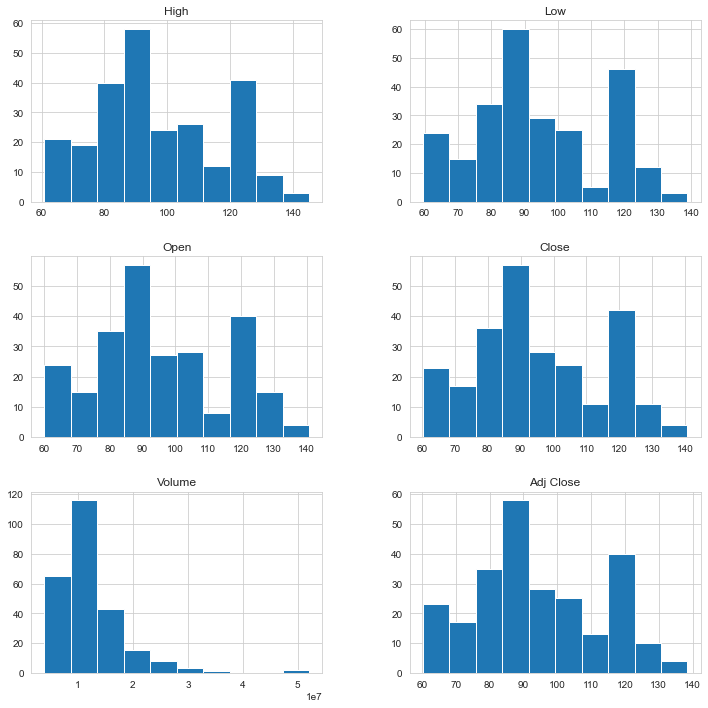

In [6]:

df.groupby("company_name").hist(figsize=(12, 12));

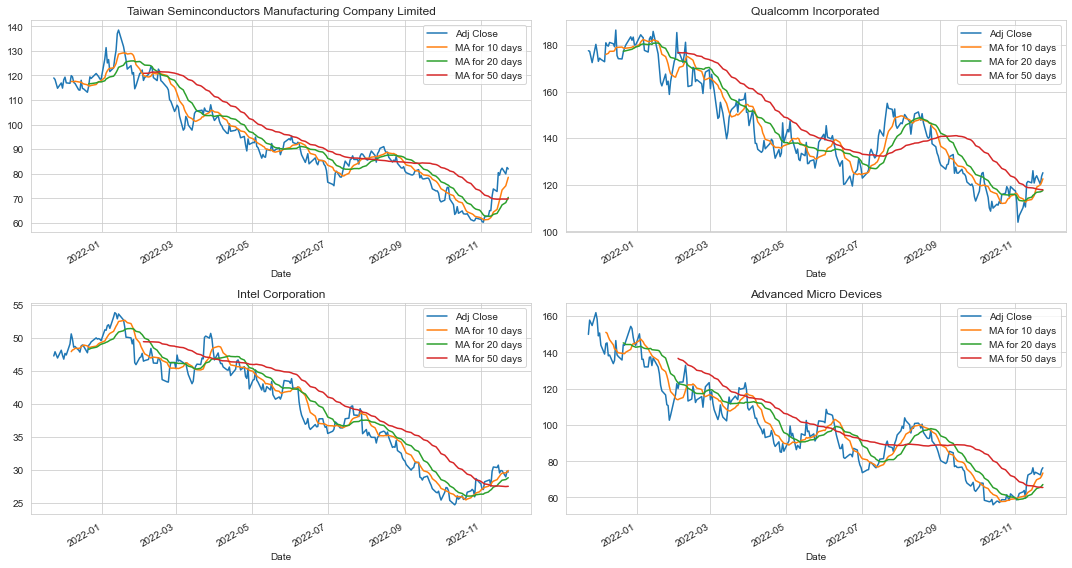

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

TSM[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('Taiwan Seminconductors Manufacturing Company Limited')

QCOM[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('Qualcomm Incorporated')

INTC[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('Intel Corporation')

AMD[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('Advanced Micro Devices')

fig.tight_layout()

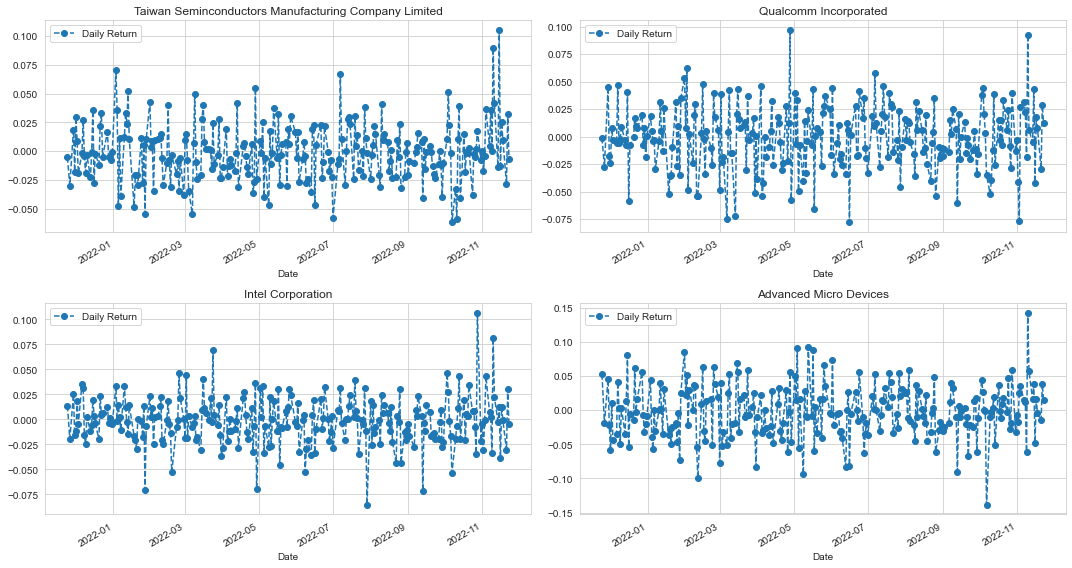

In [8]:
# We have used pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# To plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

TSM['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('Taiwan Seminconductors Manufacturing Company Limited')

QCOM['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('Qualcomm Incorporated')

INTC['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('Intel Corporation')

AMD['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('Advanced Micro Devices')

fig.tight_layout()

C:\Users\pramo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pramo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pramo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

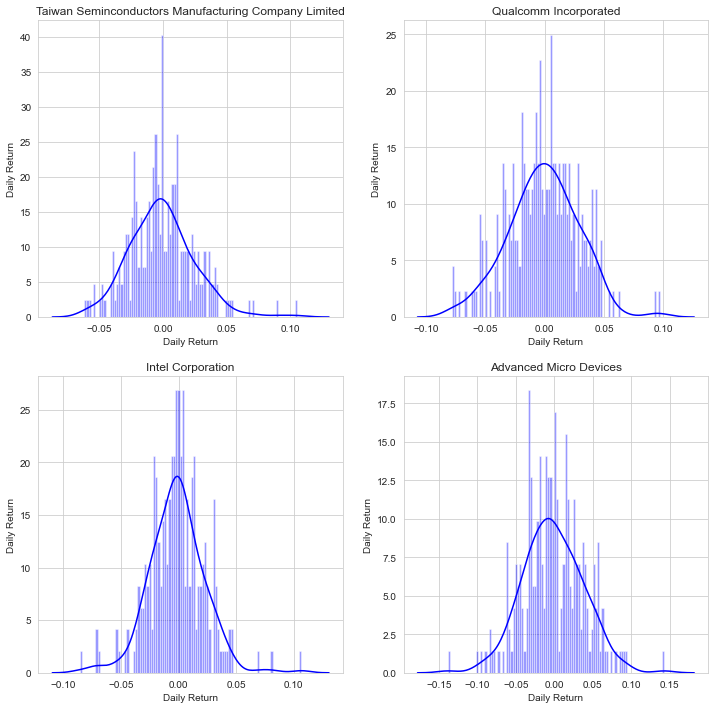

In [9]:
# To get a better view of above chart
plt.figure(figsize=(12, 12))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='blue')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')

In [10]:

# Creating a new DataFrame for Closing prices
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']
closing_df.head()

Symbols,TSM,QCOM,INTC,AMD
Date,,,,
2021-11-23,118.976845,177.573303,47.225601,149.919998
2021-11-24,118.339615,177.347580,47.860409,157.800003
2021-11-26,114.790695,172.470047,46.917816,154.809998
2021-11-29,116.937698,180.321198,48.091248,161.910004
2021-11-30,114.849525,177.200378,47.321785,158.369995


In [11]:

# Making a new DataFrame for returns
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,TSM,QCOM,INTC,AMD
Date,,,,
2021-11-23,NaN,NaN,NaN,NaN
2021-11-24,-0.005356,-0.001271,0.013442,0.052561
2021-11-26,-0.029989,-0.027503,-0.019695,-0.018948
2021-11-29,0.018704,0.045522,0.025010,0.045863
2021-11-30,-0.017857,-0.017307,-0.016000,-0.021864


C:\Users\pramo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


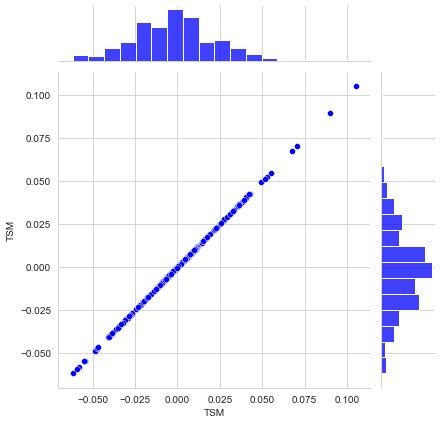

In [12]:
# Comparing TSM to itself should show a perfectly linear relationship
sns.jointplot('TSM', 'TSM', tech_rets, kind='scatter', color='blue')

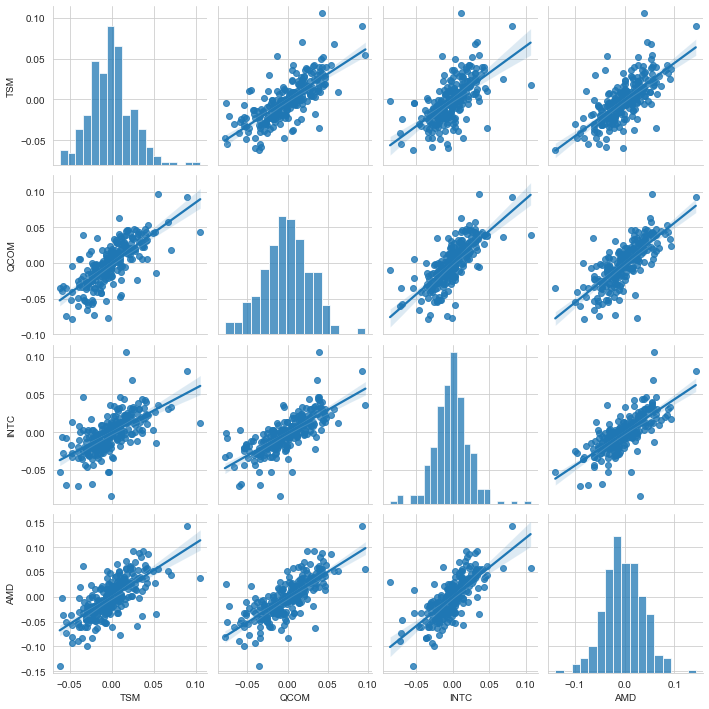

In [13]:
sns.pairplot(tech_rets, kind='reg')

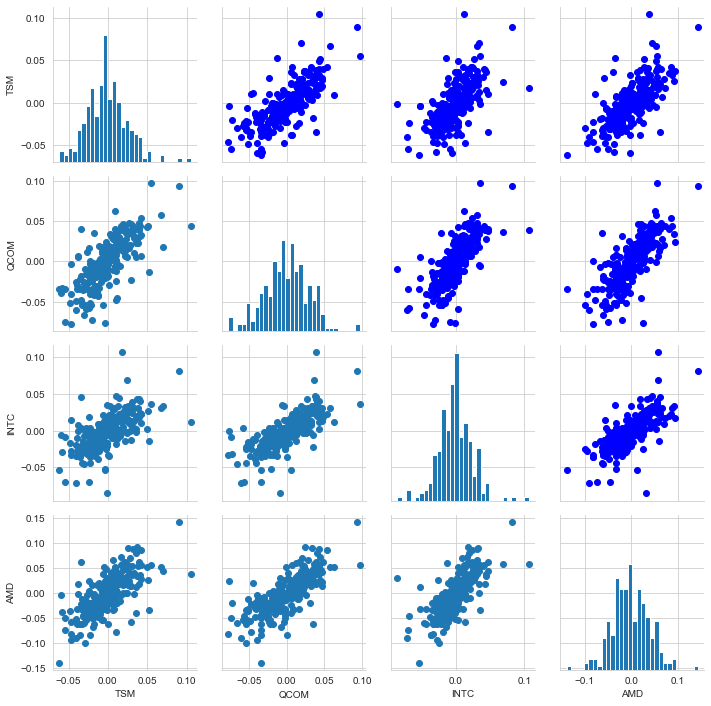

In [14]:
return_fig = sns.PairGrid(tech_rets.dropna())

return_fig.map_upper(plt.scatter, color='blue')

return_fig.map_lower(plt.scatter, cmap='blue')

return_fig.map_diag(plt.hist, bins=30)

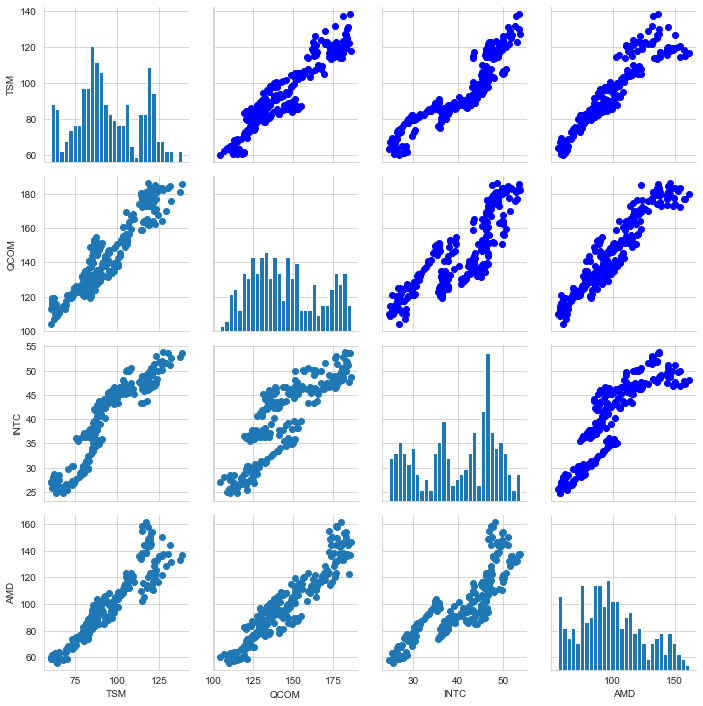

In [15]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='blue')

returns_fig.map_lower(plt.scatter,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

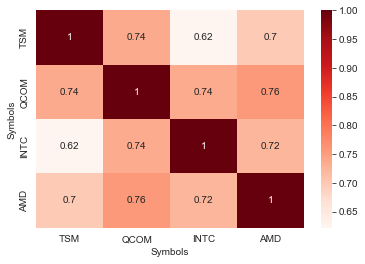

In [16]:
sns.heatmap(tech_rets.corr(), annot=True, cmap='Reds')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

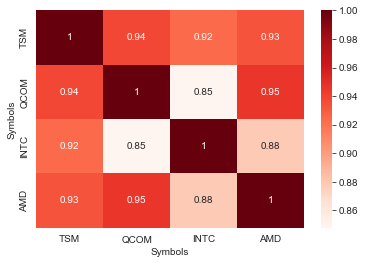

In [17]:
sns.heatmap(closing_df.corr(), annot=True, cmap='Reds')

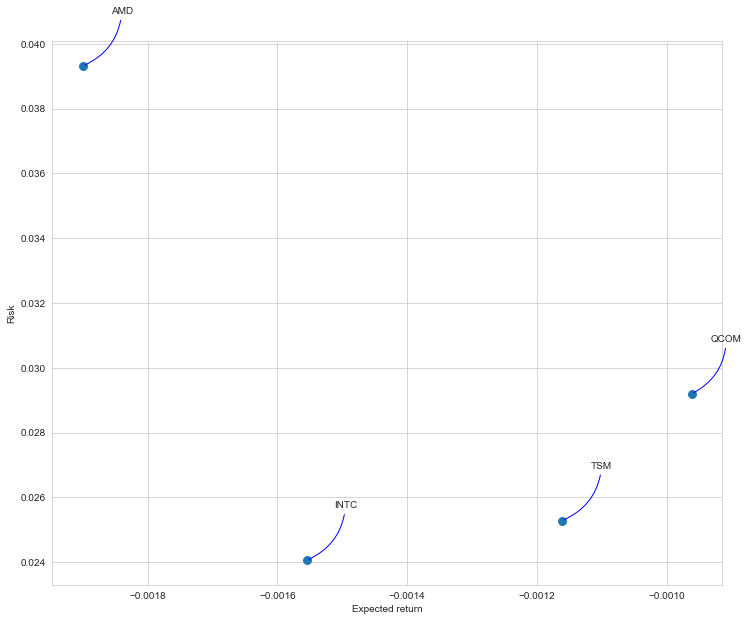

In [18]:
rets = tech_rets.dropna()

area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))